# Lab Notebook

    Course: BioE 131
    Lab No: Lab #2
    Submission date: 05/Sep/2018
    
    Team members: Michael Fernandez, Jinho Ko
    

# 1. data procssing input / output 
How did we process the data

- input 1
muscle –in seqs.fa –out seqs.aligned.fa

- output 1
MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seqs 48 seqs, max length 2217, avg  length 2209
00:00:00    23 MB(-5%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00    23 MB(-5%)  Iter   1  100.00%  K-mer dist pass 2
00:00:03   96 MB(-19%)  Iter   1  100.00%  Align node       
00:00:03   96 MB(-19%)  Iter   1  100.00%  Root alignment
00:00:05   96 MB(-19%)  Iter   2  100.00%  Refine tree   
00:00:05   96 MB(-19%)  Iter   2  100.00%  Root alignment
00:00:05   96 MB(-19%)  Iter   2  100.00%  Root alignment
00:00:10   96 MB(-19%)  Iter   3  100.00%  Refine biparts
00:00:16   96 MB(-19%)  Iter   4  100.00%  Refine biparts
00:00:16   96 MB(-19%)  Iter   5  100.00%  Refine biparts
00:00:16   96 MB(-19%)  Iter   5  100.00%  Refine biparts


- intention 1
make multiple sequence alignment(MSA) by adding dashes within the sequence in order to maximize the scoring

---------------------------------------------------

- input 2
fasttree –nt < seqs.aligned.fa > tree.nwk

- output 2
FastTree Version 2.1.8 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.04 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.954 after 0.49 sec2, 1 of 46 splits   
ML-NNI round 1: LogLk = -15605.734 NNIs 8 max delta 16.63 Time 0.71
Switched to using 20 rate categories (CAT approximation)1 of 20   
Rate categories were divided by 0.741 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14232.579 NNIs 0 max delta 0.00 Time 0.84
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14232.478 NNIs 0 max delta 0.00 Time 1.00 (final)
Optimize all lengths: LogLk = -14232.478 Time 1.05
Total time: 1.49 seconds Unique: 48/48 Bad splits: 0/45

- intention 2
build Jukes-Cantor type tree 



# 2. Building Treen & Cluster Grouping
Building the tree diagram with Phylo

In [11]:
from Bio import Phylo

tree = Phylo.read('tree.nwk', 'newick')

"""
These inputs below were tested to search for the most appropriate diagram.

#print(tree)

#Phylo.draw_ascii(tree)

#tree.ladderize()
#Phylo.draw(tree)

"""

Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

Cluster Grouping

#1
'rh.61', 'rh.58'

#2
'pi.2', 'pi.3', 'pi.1'

#3
'rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'

#4
'rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'

#5
'cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'

#6
'rh.35', 'rh.36', 'rh.37'

#7
'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'

#8
'hu.43', 'hu.48', 'hu.44', 'hu.46'

#9
'hu.14', 'hu.31', 'hu.32', 'rh.43'

#10
'rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39'

# 3. BLAST Result & Analysis
To verify what gene what we are analyzing now
Analyzing by the second sequence in each cluster array

In [33]:
from Bio import SeqIO
seq_list = [['rh.61', 'rh.58'],
           ['pi.2', 'pi.3', 'pi.1'],
           ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'],
           ['rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'],
           ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'],
           ['rh.35', 'rh.36', 'rh.37'],
           ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'],
           ['hu.43', 'hu.48', 'hu.44', 'hu.46'],
           ['hu.14', 'hu.31', 'hu.32', 'rh.43'],
           ['rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39']]

for cluster in seq_list:
    for idx, seq_id in enumerate(cluster):
        if idx is 1:    #second element of each cluster
            for record in SeqIO.parse("seqs.aligned.fa", "fasta"):
                if record.id == seq_id:
                    print(record.id)    # print sequence id
                    print(record.seq)   # print sequence


rh.58
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCCAAGCCCAAGGCCAACCAGCAGAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGCTGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAACCGTCACCTCAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCTAGAAAGAGACTGAACTTTGGGCAGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCTCCAGCAGCGCCCTCTAGTGTGGGATCTGGTACAATGGCCGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGTGCCGACGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCACCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAAGAGGTCACGCAGAATGAAGGCA

* top 3 match

- Cluster 1: tested with rh.58 (O,X,X)
1. Adeno-associated virus isolate rh.58 capsid protein VP1 (cap) gene, complete cds
2. Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds 
3. Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds 

- Cluster 2: tested with pi.3 (O,O,O)
1.  Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds 
2.  Adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds 
3.  Adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene, complete cds 

- Cluster 3: tested with bb.1 (O,O,O)
1. Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene, complete cds 
2. Non-human primate Adeno-associated virus isolate AAVbb.2 capsid protein (VP1) gene, complete cds
3. Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds 

- Cluster 4: tested with rh.40 (O,O,O)
1. Adeno-associated virus isolate rh.40 capsid protein VP1 (cap) gene, complete cds
2. Adeno-associated virus isolate hu.67 capsid protein VP1 (cap) gene, complete cds 
3. Adeno-associated virus isolate hu.40 capsid protein VP1 (cap) gene, complete cds 

- Cluster 5: tested with cy.6 (O,O,O)
1. Non-human primate Adeno-associated virus isolate AAVcy.6 capsid protein (VP1) gene, complete cds 
2. Non-human primate Adeno-associated virus isolate AAVrh.13 capsid protein (VP1) gene, complete cds
3. Adeno-associated virus isolate cy.5R4 capsid protein VP1 gene, partial cds

- Cluster 6: tested with rh.36 (O,O,O)
1. Non-human primate Adeno-associated virus isolate AAVrh.36 capsid protein (VP1) gene, complete cds
2. Adeno-associated virus isolate rh.37R2 capsid protein VP1 gene, partial cds 
3. Non-human primate Adeno-associated virus isolate AAVrh.35 capsid protein (VP1) gene, complete cds 

- Cluster 7: tested with rh.54 (O,O,O)
1. Adeno-associated virus isolate rh.54 capsid protein VP1 (cap) gene, complete cds 
2. Adeno-associated virus isolate rh.48 capsid protein VP1 (cap) gene, complete cds 
3. Adeno-associated virus isolate rh.48R2 capsid protein VP1 gene, partial cds

- Cluster 8: tested with hu.48 (O,O,?)
1. Adeno-associated virus isolate hu.48 capsid protein VP1 (cap) gene, complete cds 
2. Adeno-associated virus isolate hu.48R3 capsid protein VP1 gene, partial cds 
3. Adeno-associated virus 1, complete genome

- Cluster 9 : tested with hu.31 (O,O,O)
1. Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene, complete cds 
2. Adeno-associated virus isolate hu.32 capsid protein VP1 (cap) gene, complete cds 
3. Adeno-associated virus 9 isolate hu.14 capsid protein VP1 (cap) gene, complete cds 

- Cluster 10: tested with rh.57 (O,O,O)
1. Adeno-associated virus isolate rh.57 capsid protein VP1 (cap) gene, complete cds 
2. Adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds 
3. Adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds 

* Analysis
BLAST is quite precise, it shows the exact name as first match. Almost every(except cluster 1) results shows the member in same cluster as top-3 match. And almost every analaysis directs to the same gene as, 'Adeno-associated virus isolate XXX capsid protein VP1 Gene. There are some mismatch in cluster 8-3, or cluster 1-1, 1-2.

Q. Why might we not trust the annotations for	sequences that come	up in our BLAST?

For example,
- Cluster 6: tested with rh.36 (O,O,O)
1. Non-human primate Adeno-associated virus isolate AAVrh.36 capsid protein (VP1) gene, complete cds
2. Adeno-associated virus isolate rh.37R2 capsid protein VP1 gene, partial cds 

Small differences between top choices can make it difficult to decide between two similar genes.


# 4. Barplot
Barplots of AT/GC ratio, comparing every nt location within cluster
* We didn't count '-'s(alignment dash) in our numerator.
* The length of x is 2238 (same aligned length for every gene)
* please download the image and ZOOM IN to verify the exact data

----- Cluster #1 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  1924   2510    42  0.434  0.566


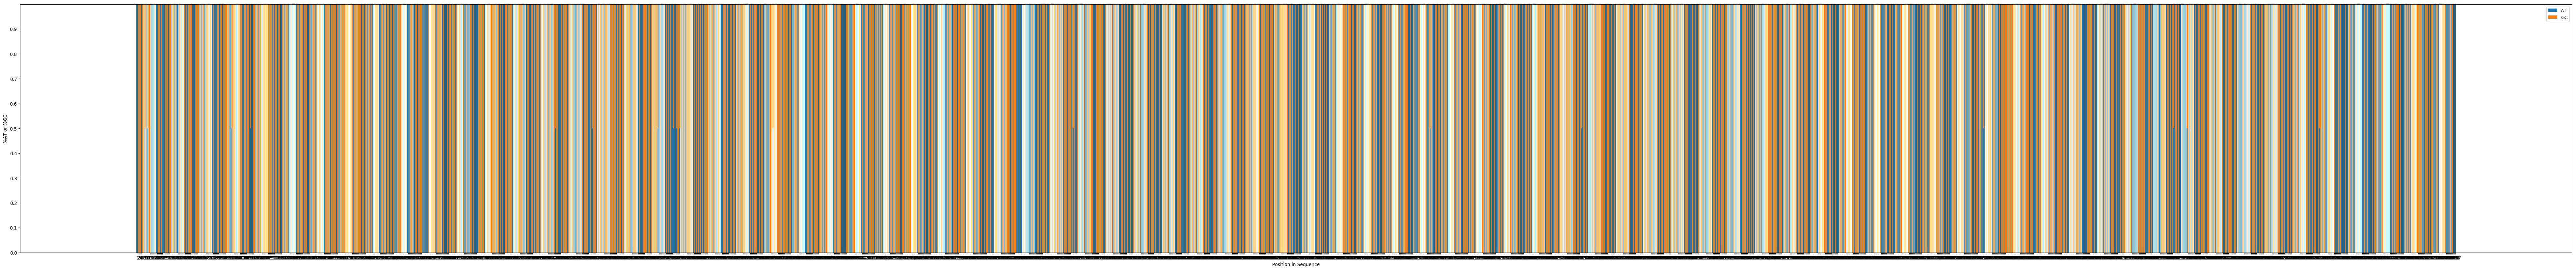

----- Cluster #2 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  2731   3857   126  0.415  0.585


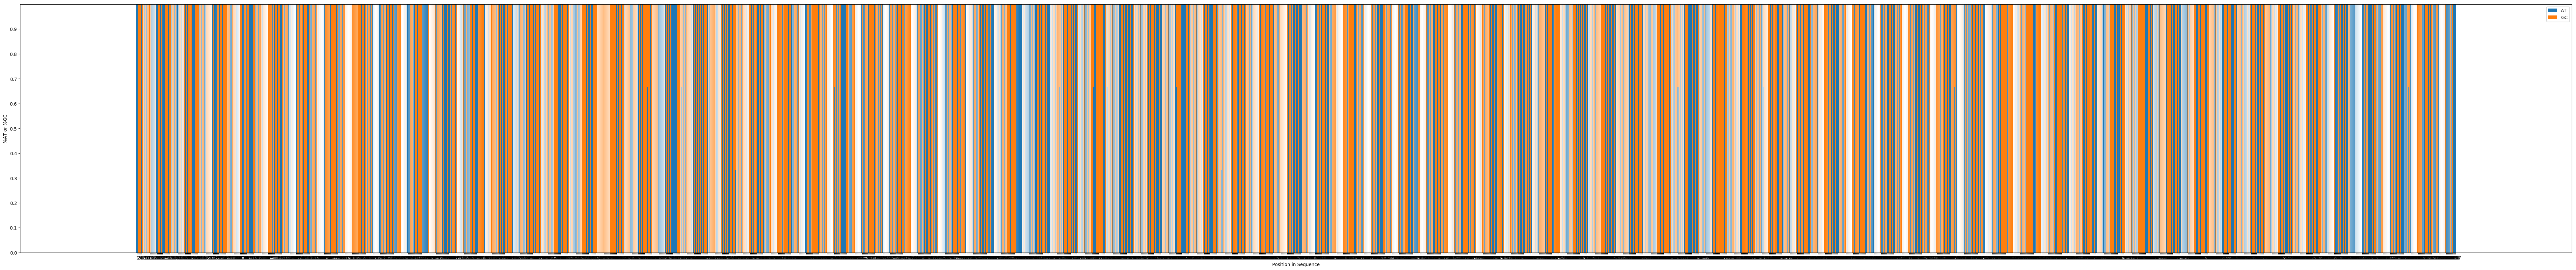

----- Cluster #3 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  4873   6212   105   0.44   0.56


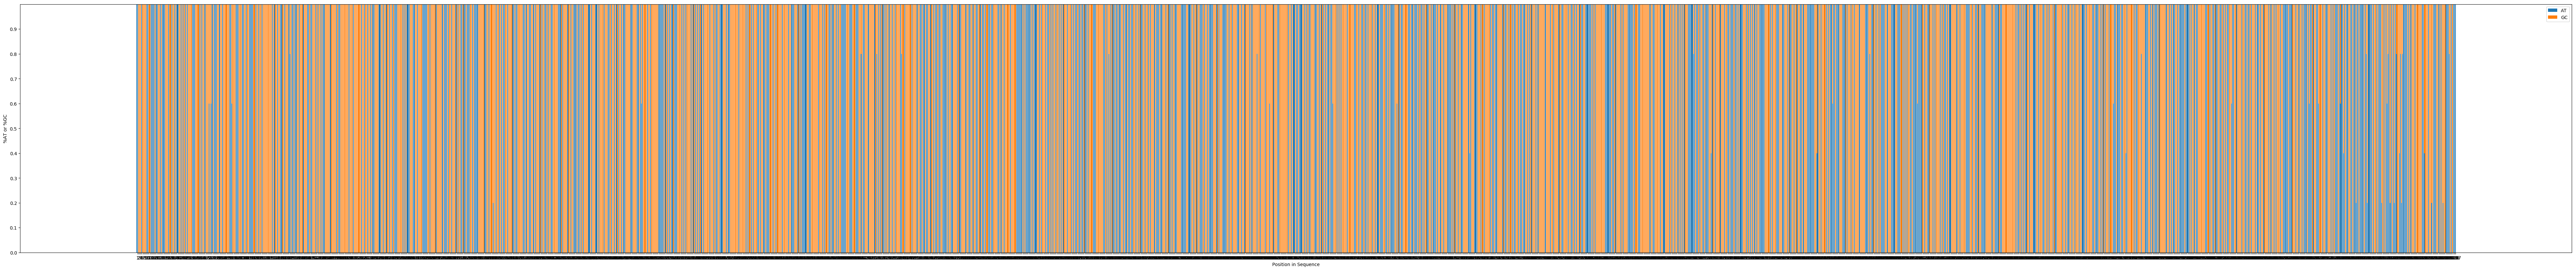

----- Cluster #4 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  8999  10954   189  0.451  0.549


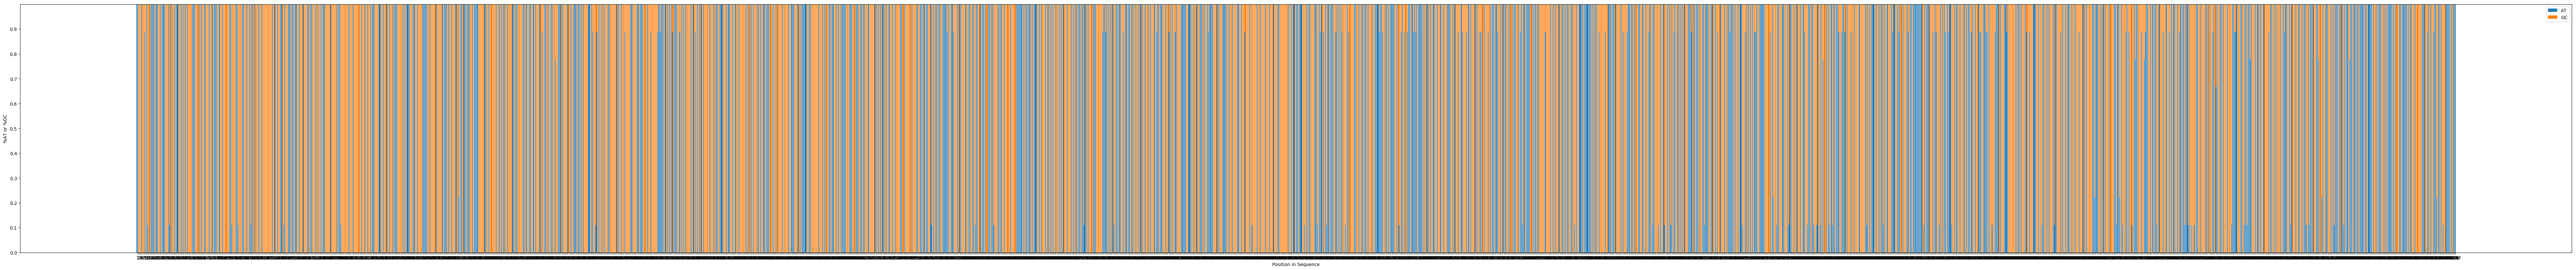

----- Cluster #5 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  4798   6137   255  0.439  0.561


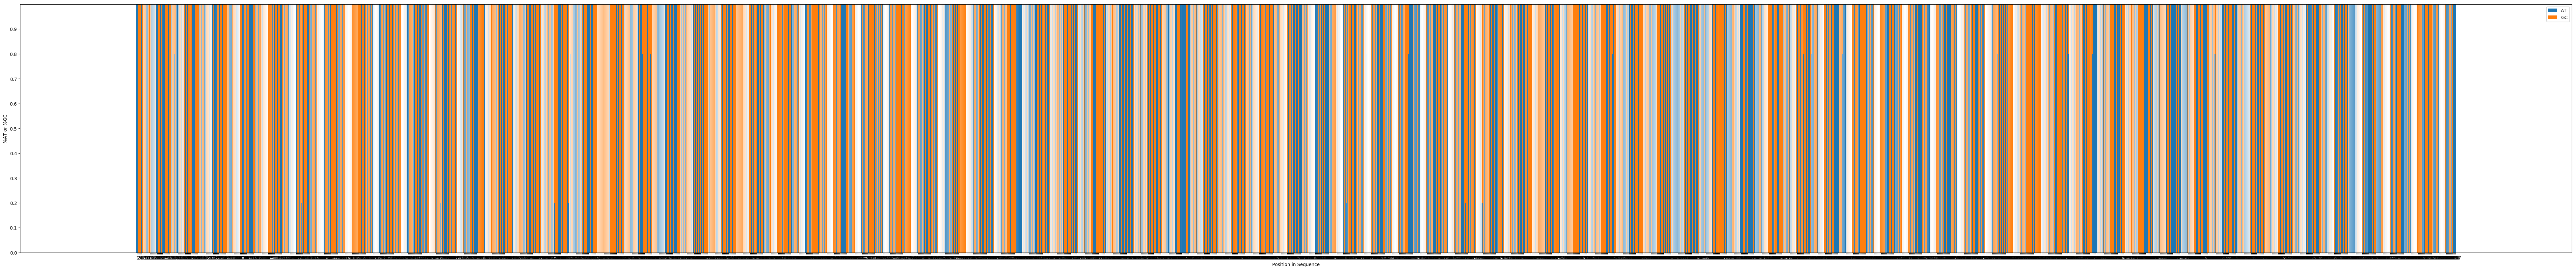

----- Cluster #6 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  2949   3621   144  0.449  0.551


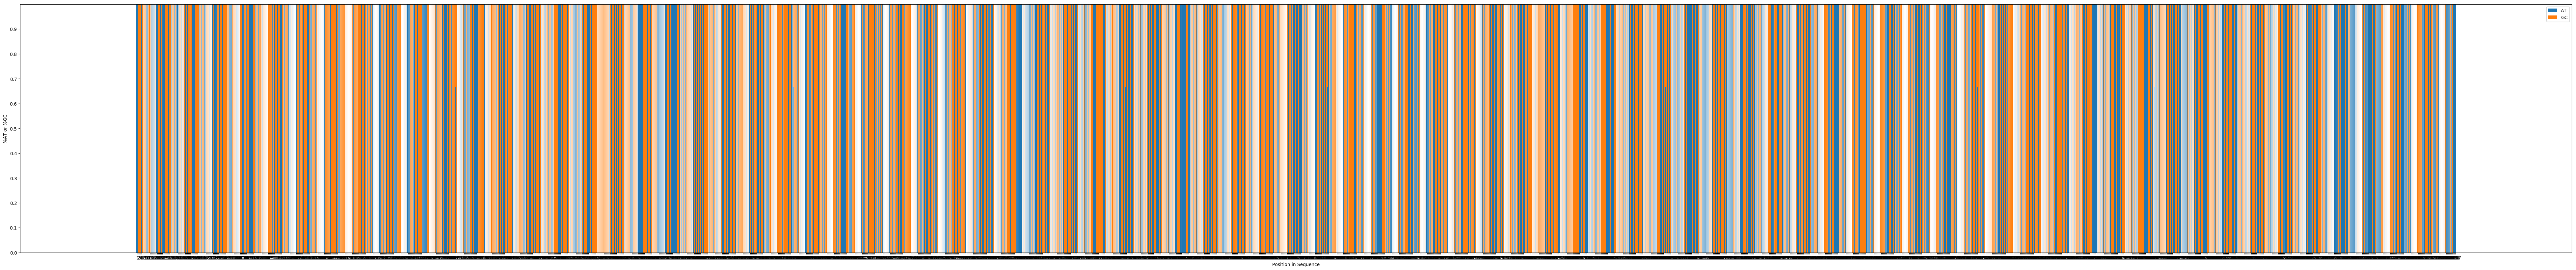

----- Cluster #7 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  4913   6157   120  0.444  0.556


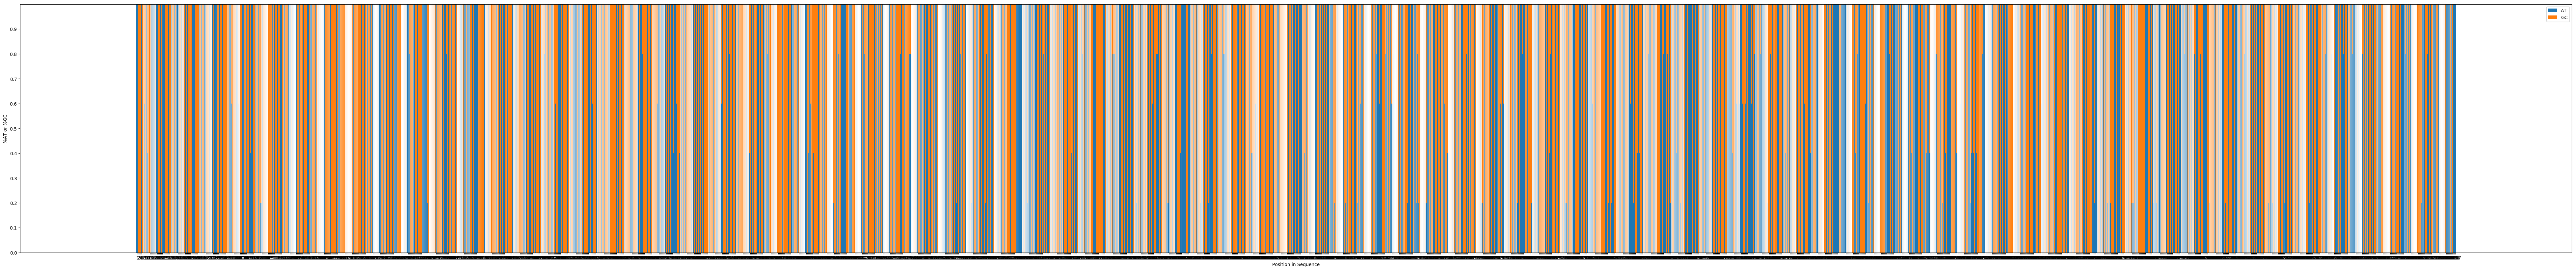

----- Cluster #8 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  4069   4778   105   0.46   0.54


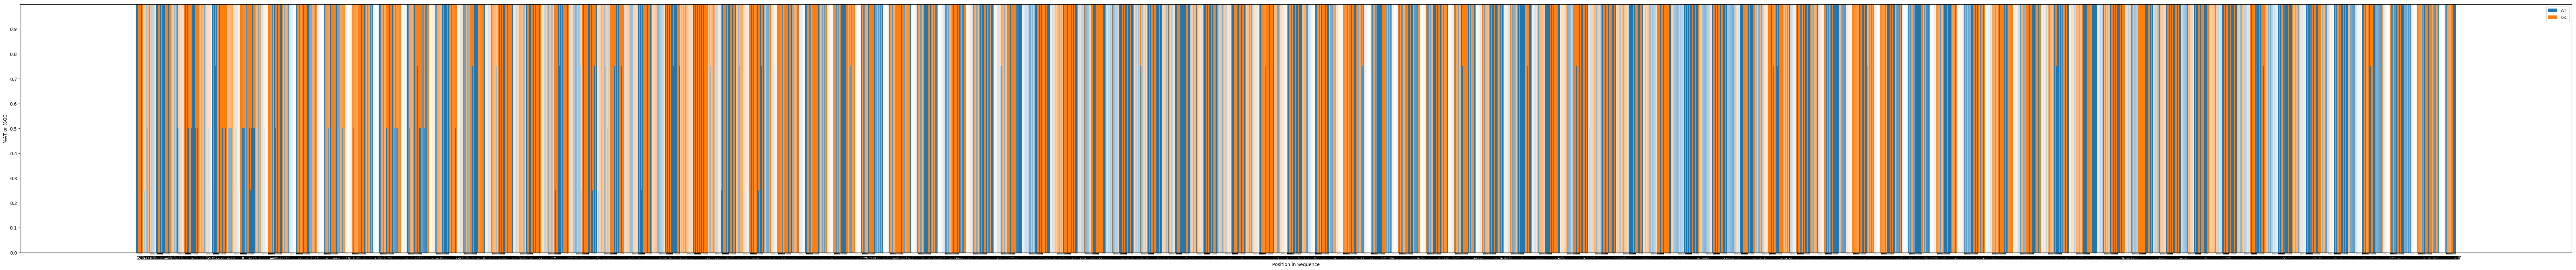

----- Cluster #9 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  4131   4713   108  0.467  0.533


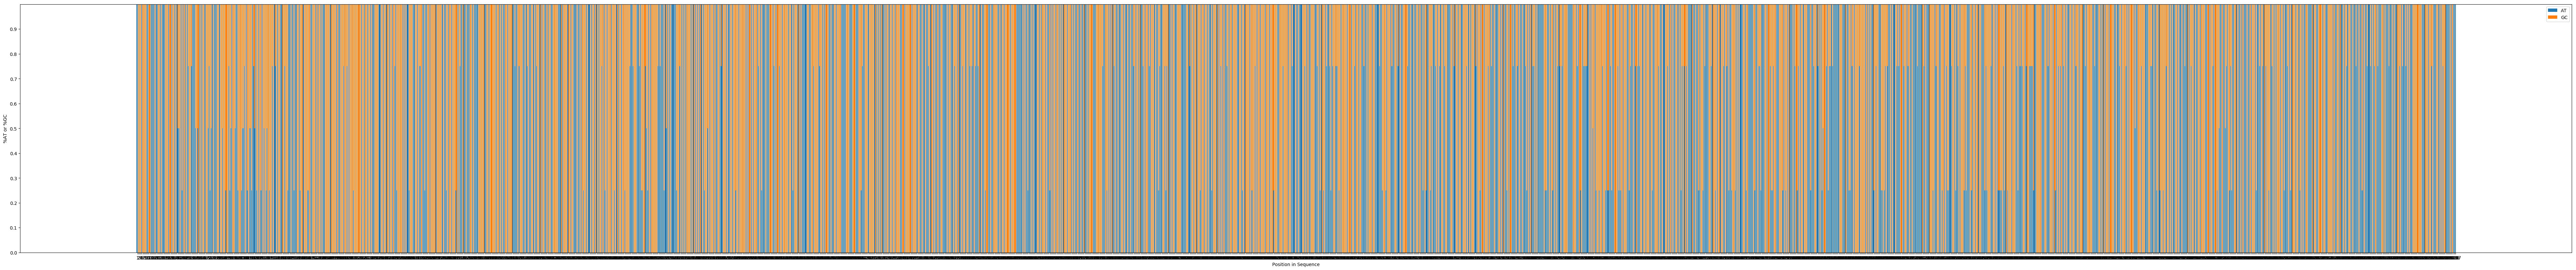

----- Cluster #10 -------------------------------
   A/T    G/C  blnk  AT.ro  GC.ro
  7706  10030   168  0.434  0.566


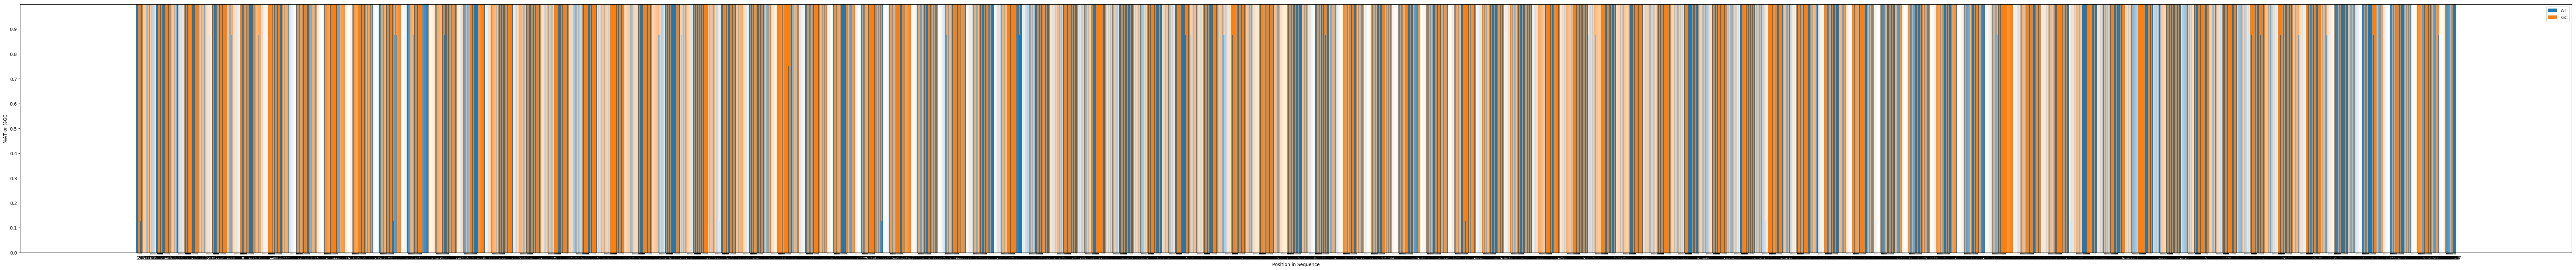

In [34]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

seq_list = [['rh.61', 'rh.58'],
           ['pi.2', 'pi.3', 'pi.1'],
           ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'],
           ['rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'],
           ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'],
           ['rh.35', 'rh.36', 'rh.37'],
           ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'],
           ['hu.43', 'hu.48', 'hu.44', 'hu.46'],
           ['hu.14', 'hu.31', 'hu.32', 'rh.43'],
           ['rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39']]

## length of every aligned sequence = 2238
N = 2238

for idx, cluster in enumerate(seq_list):
    
    figure(num=None, figsize=(100, 10), dpi=100)
    
    at = [ 0 for _ in range(N)] ## A/T
    gc = [ 0 for _ in range(N)] ## G/C
    bl = [ 0 for _ in range(N)] ## BLANK
    
    for seq_id in cluster:
        sequence = []
        for record in SeqIO.parse("seqs.aligned.fa", "fasta"):
            if(record.id==seq_id):
                sequence = record.seq
        
        #print(len(sequence))
        for n in range(len(sequence)):
            nt = sequence[n]
            if nt == 'A' or nt == 'T':
                at[n]+=1
            elif nt == 'G' or nt == 'C' :
                gc[n]+=1
            else :
                bl[n]+=1
    
    sum_at = sum(at)
    sum_gc = sum(gc)
    sum_bl = sum(bl)
    
    print('----- Cluster #'+str(idx+1)+ ' -------------------------------')
    print('A/T'.rjust(6), 'G/C'.rjust(6), 'blnk'.rjust(5), end=' ')
    print('AT.ro'.rjust(6),'GC.ro'.rjust(6))
    print(repr(sum_at).rjust(6),repr(sum_gc).rjust(6),repr(sum_bl).rjust(5),end=' ')
    print(repr(round(sum_at/(sum_at+sum_gc),3)).rjust(6),repr(round(sum_gc/(sum_at+sum_gc),3)).rjust(6) )
    

    
    bar_data = [ 0 for _ in range(N)] # list for AT ratio
    
    for i in range(N):
        if at[i]+gc[i] is not 0:  # we do not consider blank in our value
            bar_data[i] = (at[i]/(at[i]+gc[i]))
        else:
            bar_data[i] = 0
    
    reversebar_data = [ 1.0-bar_data[i] for i in range(N) ] # reversed list for GC ratio
    
    ind = np.arange(N)
    p1 = plt.bar(ind, bar_data, 0.7 )
    p2 = plt.bar(ind, reversebar_data,0.7, bottom = bar_data )

    plt.xlabel('Position in Sequence')
    plt.ylabel('%AT or %GC')
    plt.xticks(np.arange(1,N,1))
    plt.yticks(np.arange(0,1.0,0.1))
    
    plt.legend((p1[0],p2[0]),('AT', 'GC'))
    
    plt.show()
    

# 5. Boxplot
Boxplot of the distribution, mean of sequence length within each cluster.
* distribution not seen very well, because they are small compared to the value range of mean.

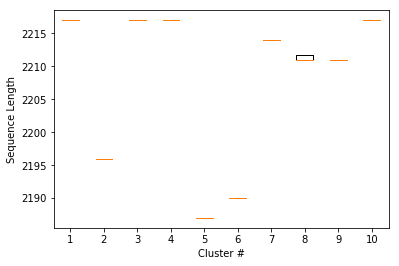

In [26]:
import matplotlib.pyplot as plt
from Bio import SeqIO

seq_list = [['rh.61', 'rh.58'],
           ['pi.2', 'pi.3', 'pi.1'],
           ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6'],
           ['rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'],
           ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'],
           ['rh.35', 'rh.36', 'rh.37'],
           ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'],
           ['hu.43', 'hu.48', 'hu.44', 'hu.46'],
           ['hu.14', 'hu.31', 'hu.32', 'rh.43'],
           ['rh.64', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.50', 'rh.52', 'hu.39']]


box_data = [[] for _ in range(10)]
fig, ax = plt.subplots()

for idx, cluster in enumerate(seq_list):
    for seq_id in cluster:
        for record in SeqIO.parse("seqs.fa", "fasta"):
            if(record.id==seq_id):
                box_data[idx].append(len(record.seq))

ax.boxplot(box_data, 0, '')
ax.set_xlabel('Cluster #')
ax.set_ylabel('Sequence Length')
plt.show()